## Overview of perceptron

在机器学习中，感知机是一种二分类的线性分类模型，属于surprised learning algorithm。它的input是样本的特征向量，output为类别（这里取-1，1）

感知机的学习算法具有简单而易于实现的优点，分为原始形式和对偶形式，感知机预测使用学习到的模型对于新的模型进行预测，属于discriminate模型。之后我们可以看一下如何用Paddle来实现感知机的过程

## Make perceptron with Paddle

### 生成数据

In [43]:
import paddle
import numpy as np
import matplotlib.pyplot as plt
print(paddle.__version__)

2.3.2


In [44]:
np.random.seed(0)
num=100 # 样本的数量num

# 生成数据集 x1、x2、y（0/1）
x1=np.random.normal(6,1,size=(num))
x2=np.random.normal(3,1,size=(num))
y=np.ones(num)
class1=np.array([x1,x2,y])
x1=np.random.normal(3,1,size=(num))
x2=np.random.normal(6,1,size=(num))
y=np.ones(num)*(-1)
class2=np.array([x1,x2,y])
print(class1.shape)


(3, 100)


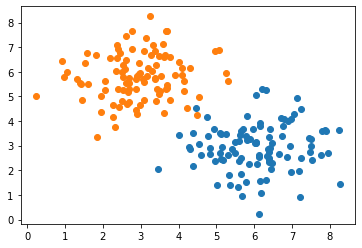

In [45]:
class1=class1.T
class2=class2.T
plt.scatter(class1[:,0],class2[:,0])
plt.scatter(class2[:,0],class2[:,1])

In [46]:
dataset=np.concatenate((class1,class2))
print(dataset)

[[ 7.76405235  4.8831507   1.        ]
 [ 6.40015721  1.65224094  1.        ]
 [ 6.97873798  1.729515    1.        ]
 [ 8.2408932   3.96939671  1.        ]
 [ 7.86755799  1.82687659  1.        ]
 [ 5.02272212  4.94362119  1.        ]
 [ 6.95008842  2.58638102  1.        ]
 [ 5.84864279  2.25254519  1.        ]
 [ 5.89678115  4.92294203  1.        ]
 [ 6.4105985   4.48051479  1.        ]
 [ 6.14404357  4.86755896  1.        ]
 [ 7.45427351  3.90604466  1.        ]
 [ 6.76103773  2.13877431  1.        ]
 [ 6.12167502  4.91006495  1.        ]
 [ 6.44386323  2.73199663  1.        ]
 [ 6.33367433  3.8024564   1.        ]
 [ 7.49407907  3.94725197  1.        ]
 [ 5.79484174  2.84498991  1.        ]
 [ 6.3130677   3.61407937  1.        ]
 [ 5.14590426  3.92220667  1.        ]
 [ 3.44701018  3.37642553  1.        ]
 [ 6.6536186   1.90059921  1.        ]
 [ 6.8644362   3.29823817  1.        ]
 [ 5.25783498  4.3263859   1.        ]
 [ 8.26975462  2.30543214  1.        ]
 [ 4.54563433  2.85036546

In [54]:
np.random.shuffle(dataset)
print(dataset.shape)
train_data_x=dataset[:150,:2]
train_data_y=dataset[:150,-1]
# 转换为Paddle的tensor格式
x_data=paddle.to_tensor(train_data_x.astype('float32'))
y_data=paddle.to_tensor(train_data_y.astype('float32'))

(200, 3)


### 建立模型
感知机的基本模型为
$$y=w^TX+b

In [56]:
linear=paddle.nn.Linear(in_features=2,out_features=1)

mse_loss=paddle.nn.MSELoss()

sgd_opt=paddle.optimizer.SGD(learning_rate=0.001,parameters=linear.parameters())

### 训练模型

In [57]:
total_epoch=50000
for i in range(total_epoch):
    y_predict=linear(x_data)
    loss=mse_loss(y_predict,y_data)

    # 梯度下降更新参数
    loss.backward()
    sgd_opt.step()
    sgd_opt.clear_grad()

    # 输出一些参数
    if i%1000==0:
        print("epoch {} loss {}".format(i, loss.numpy()))
    

epoch 0 loss [32.266922]
epoch 1000 loss [0.99909306]
epoch 2000 loss [0.99901026]
epoch 3000 loss [0.99895954]
epoch 4000 loss [0.9989028]
epoch 5000 loss [0.9988427]
epoch 6000 loss [0.9988092]
epoch 7000 loss [0.998769]
epoch 8000 loss [0.9987201]
epoch 9000 loss [0.99870104]
epoch 10000 loss [0.9986607]
epoch 11000 loss [0.9986278]
epoch 12000 loss [0.99862015]
epoch 13000 loss [0.99858713]
epoch 14000 loss [0.9985772]
epoch 15000 loss [0.9985533]
epoch 16000 loss [0.9985368]
epoch 17000 loss [0.9985222]
epoch 18000 loss [0.99850017]
epoch 19000 loss [0.9985033]
epoch 20000 loss [0.9984899]
epoch 21000 loss [0.99847275]
epoch 22000 loss [0.99847484]
epoch 23000 loss [0.9984642]
epoch 24000 loss [0.9984549]
epoch 25000 loss [0.9984547]
epoch 26000 loss [0.99844635]
epoch 27000 loss [0.99844533]
epoch 28000 loss [0.99844116]
epoch 29000 loss [0.9984363]
epoch 30000 loss [0.9984313]
epoch 31000 loss [0.9984292]
epoch 32000 loss [0.99842143]
epoch 33000 loss [0.99841547]
epoch 34000 lo

### 训练结果

In [58]:
w1=linear.weight.numpy()[0].item()
w2=linear.weight.numpy()[1].item()
b=linear.bias.numpy().item()

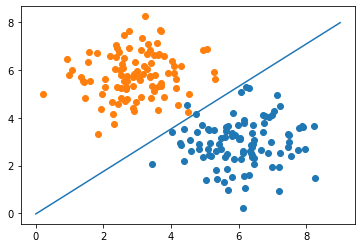

In [59]:
plt.scatter(class1[:,0],class2[:,0])
plt.scatter(class2[:,0],class2[:,1])
x=np.arange(10)
y=w1*np.arange(10)/w2+b
plt.plot(x,y)
